In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
commodities_monthly = pd.read_csv('variables_of_interest/commodities_monthly.csv')
commodities_monthly.drop(columns=['Unnamed: 0'])

,Year,Month,Coffee,Corn,Sugar
0,1990,1,75.829987,105.900513,14.200001
1,1990,2,84.010010,106.294167,14.650002
2,1990,3,93.959991,109.837318,15.310001
3,1990,4,93.730011,118.498337,15.240002
4,1990,5,92.019989,121.254097,14.619999
...,...,...,...,...,...
404,2023,9,183.589048,223.847666,26.563810
405,2023,10,183.951364,221.902519,26.903636
406,2023,11,197.433182,209.040297,27.309545
407,2023,12,210.310476,207.397969,22.145714


In [3]:
temp_etf = pd.read_csv('etf_vs/data/etf_normalized_vs_meat_monthly.csv')
indexed_etf = pd.read_csv('variables_of_interest/index_etf_monthly.csv')
avg_etf = pd.read_csv('variables_of_interest/averaged_etf_monthly.csv')
temp_etf = temp_etf.drop(columns=['Unnamed: 0', 'Investment_Funds_ETF'])

In [4]:
merged_etfs = pd.merge(temp_etf, commodities_monthly, on=['Year','Month'], how='inner')
merged_etfs

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Unnamed: 0,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,132,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,133,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,134,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,135,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,136,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,403,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,404,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,405,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,406,197.433182,209.040297,27.309545


In [5]:
indexed_etf = indexed_etf.drop(columns=['Unnamed: 0'])
avg_etf = avg_etf.drop(columns=['Unnamed: 0'])

avg_etf

,Year,Month,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,1999,11,26.123143,32.037020,123.532964,30.897771,17.868213
1,1999,12,25.250058,29.910405,127.775099,28.549048,14.447012
2,2000,1,27.021434,28.793713,127.600368,27.169199,15.766343
3,2000,2,23.642883,25.880471,120.976988,25.973383,16.672860
4,2000,3,22.384303,24.475699,124.859277,27.144133,18.823416
...,...,...,...,...,...,...,...
287,2023,10,190.832407,139.739063,299.958132,361.241720,198.630677
288,2023,11,188.111367,147.106855,313.372833,405.460350,199.673985
289,2023,12,201.555551,164.913676,331.248612,431.683387,214.157736
290,2024,1,208.025103,167.780693,338.555578,436.769991,224.549750


In [6]:
merged_etfs = merged_etfs.drop(columns=['Unnamed: 0'])

In [174]:
merged_etfs

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,197.433182,209.040297,27.309545


In [7]:
merged_avg_etfs = pd.merge(avg_etf, commodities_monthly, on=['Year','Month'], how='inner')
merged_avg_etfs_temp = merged_avg_etfs.copy()
merged_avg_etfs_temp = merged_avg_etfs_temp.drop(columns=['Unnamed: 0'])
merged_avg_etfs_temp

,Year,Month,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,1999,11,26.123143,32.037020,123.532964,30.897771,17.868213,112.450909,85.409341,6.505000
1,1999,12,25.250058,29.910405,127.775099,28.549048,14.447012,123.165217,87.222838,5.982000
2,2000,1,27.021434,28.793713,127.600368,27.169199,15.766343,111.851429,92.953275,5.629500
3,2000,2,23.642883,25.880471,120.976988,25.973383,16.672860,104.041429,95.081619,5.351000
4,2000,3,22.384303,24.475699,124.859277,27.144133,18.823416,100.652609,95.169351,5.111200
...,...,...,...,...,...,...,...,...,...,...
286,2023,9,204.234141,147.709120,309.438922,377.625270,211.588589,183.589048,223.847666,26.563810
287,2023,10,190.832407,139.739063,299.958132,361.241720,198.630677,183.951364,221.902519,26.903636
288,2023,11,188.111367,147.106855,313.372833,405.460350,199.673985,197.433182,209.040297,27.309545
289,2023,12,201.555551,164.913676,331.248612,431.683387,214.157736,210.310476,207.397969,22.145714


In [8]:
meat_df = pd.read_csv('variables_of_interest/meat_monthly.csv')
meat_df = meat_df.drop(columns=['Unnamed: 0'])
meat_df

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50
...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20


In [ ]:
#merged_index_etf_meat = pd.merge(merged_index_etfs_temp, meat_df, on=['Year','Month'], how='inner')
#final_df = merged_index_etf_meat.copy()
#final_df

In [9]:
merged_etfs.to_csv('etf_vs/data/etf_norm_vs_commodities_vs_meat_monthly.csv')

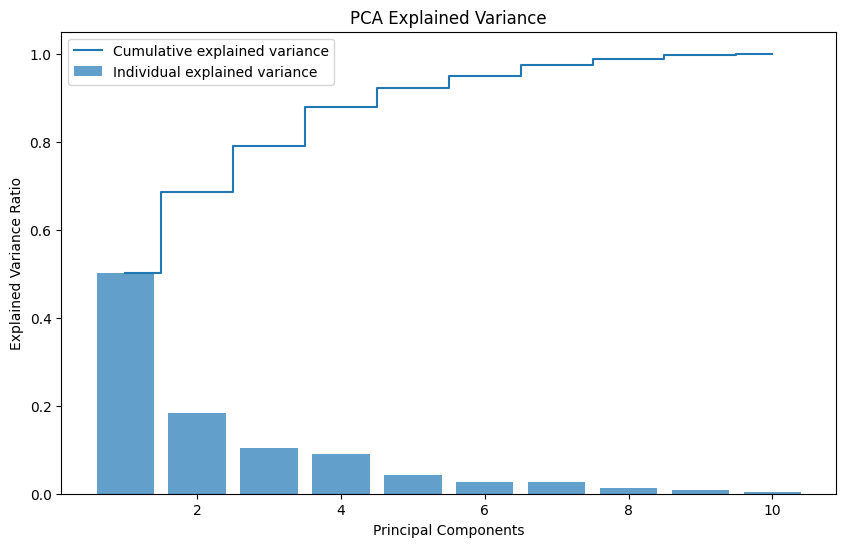

                      PC1       PC2       PC3       PC4       PC5       PC6  \
Beef             0.373537  0.736819 -0.080917  0.410438 -0.292429  0.018099   
Broilers         0.887362  0.351399  0.194644 -0.166052  0.026850 -0.012746   
Lamb and Mutton -0.834466  0.270541 -0.250941  0.062346 -0.158272 -0.091236   
Other Chicken    0.425156  0.737404 -0.110981  0.251242  0.417593 -0.053280   
Pork             0.803576  0.189244  0.318803 -0.191004 -0.338388 -0.086806   
Turkey          -0.027056 -0.440565  0.556318  0.698432  0.018287 -0.044932   
Veal            -0.878456  0.098704 -0.342884  0.213165 -0.124836 -0.025739   
Coffee           0.831243 -0.320507 -0.343321  0.043810  0.036544 -0.043786   
Corn             0.766918 -0.259853 -0.358582  0.213334 -0.082298  0.369075   
Sugar            0.724637 -0.395207 -0.395597  0.136421 -0.039627 -0.344526   

                      PC7       PC8       PC9      PC10  
Beef            -0.233133  0.049291 -0.054116 -0.025397  
Broilers      

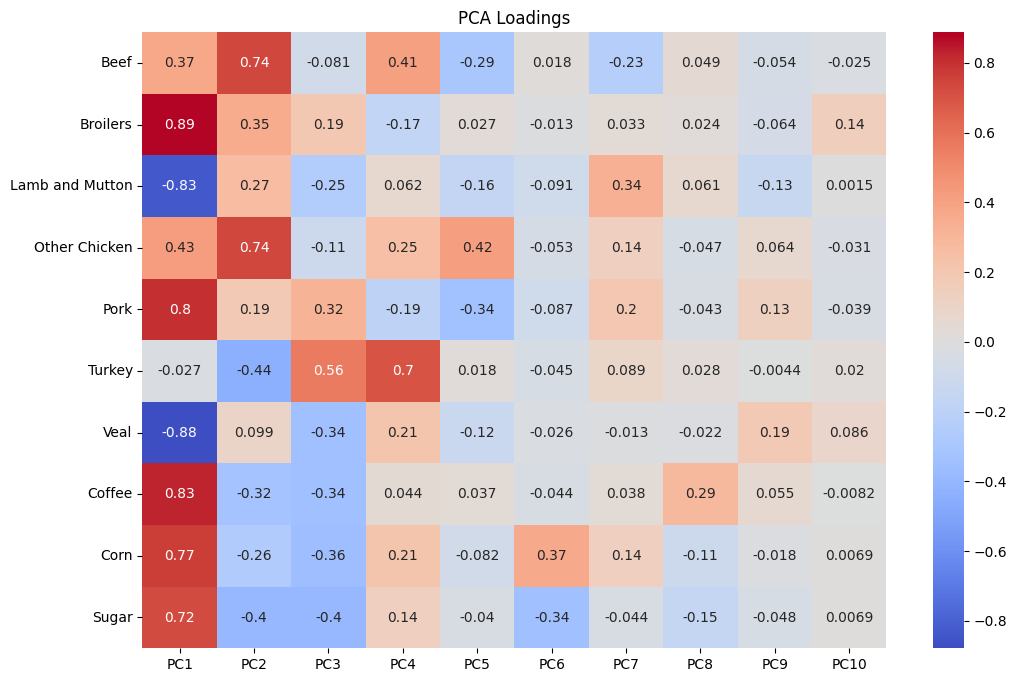

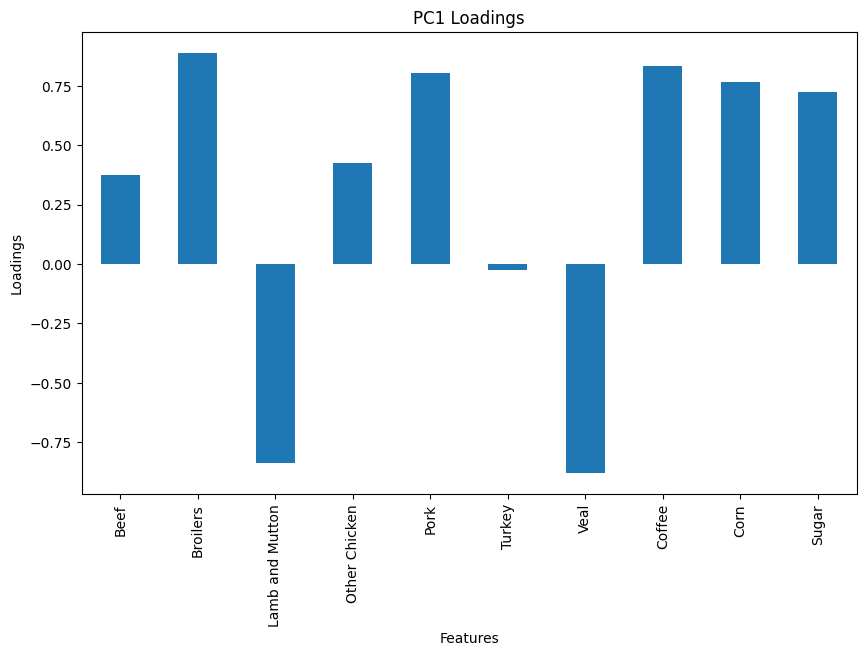

Model performance for Agri_Machinery_ETF:
Mean Squared Error (MSE): 1009.67630060421
Mean Absolute Error (MAE): 17.083039918327337
Root Mean Squared Error (RMSE): 31.77540401952759
R-squared (R²): 0.6910313924991942



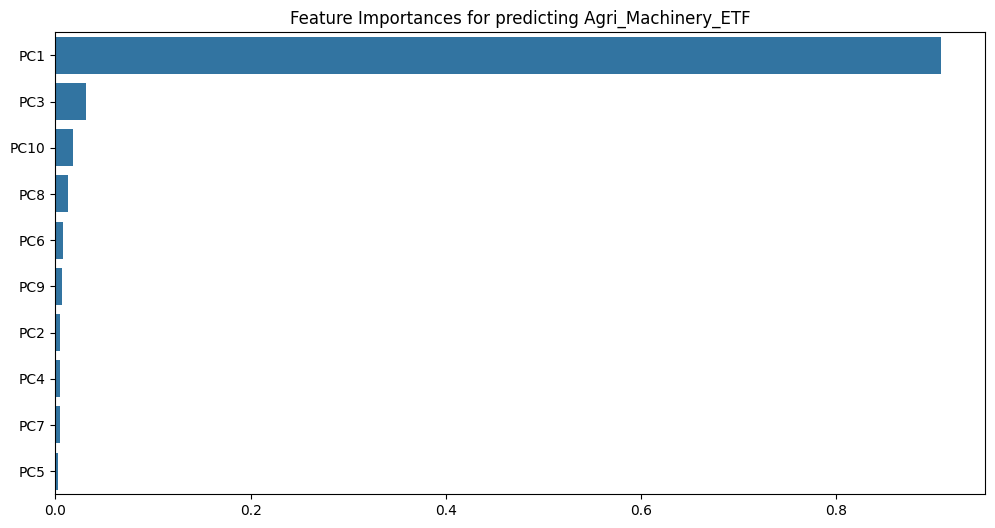

Model performance for Food_Beverage_ETF:
Mean Squared Error (MSE): 1140.3298274720644
Mean Absolute Error (MAE): 12.667669826697692
Root Mean Squared Error (RMSE): 33.76877000235668
R-squared (R²): 0.6493261358540909



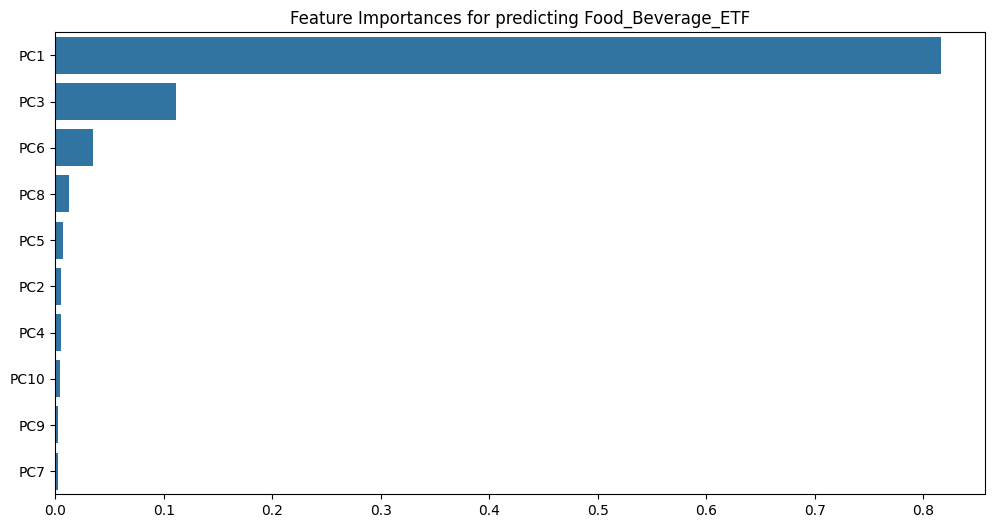

Model performance for Restaurant_FastFood_ETF:
Mean Squared Error (MSE): 28355.625082842245
Mean Absolute Error (MAE): 76.77641259930489
Root Mean Squared Error (RMSE): 168.39128564994758
R-squared (R²): 0.5777175781244065



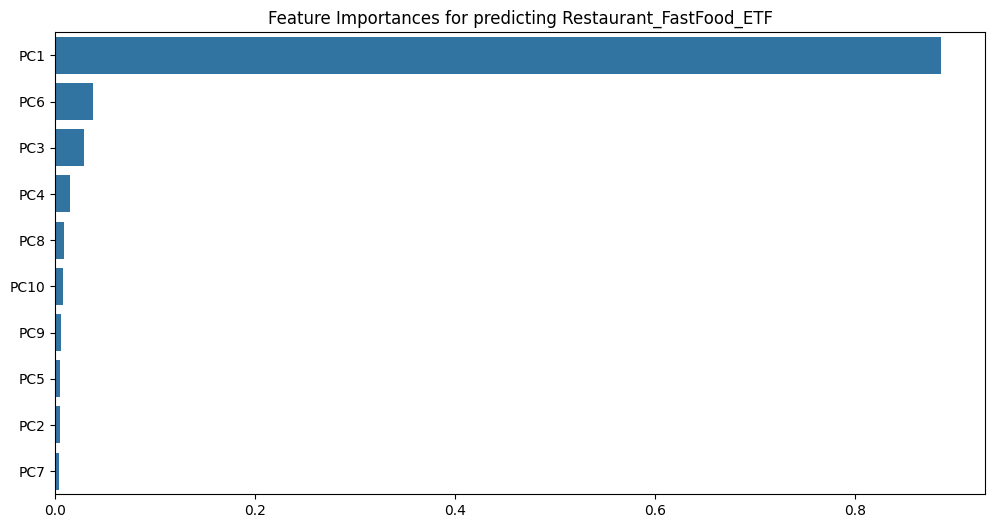

Model performance for Retail_ETF:
Mean Squared Error (MSE): 587.1515370087816
Mean Absolute Error (MAE): 13.362335557855697
Root Mean Squared Error (RMSE): 24.231209978223983
R-squared (R²): 0.7501722589357931



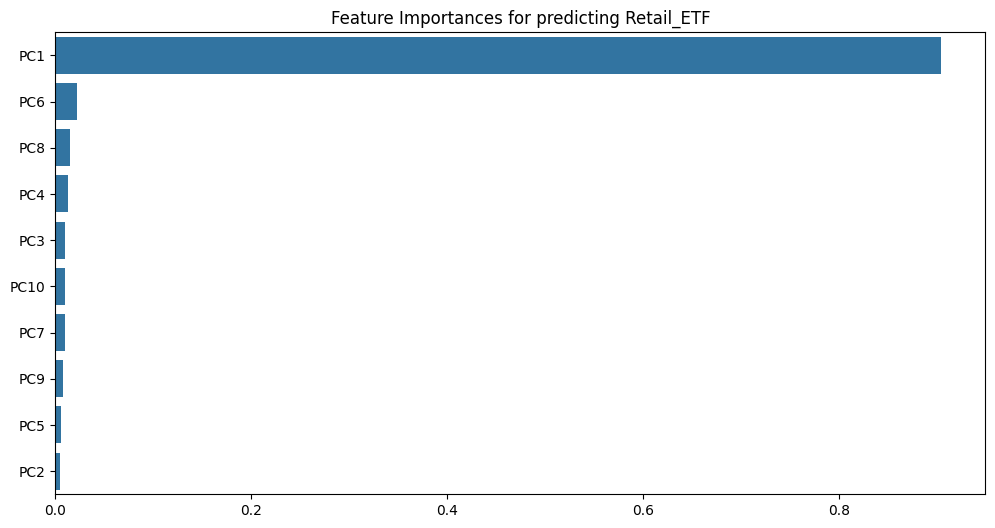

In [10]:
features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn', 'Sugar']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_etfs[features]) # merged_etfs

pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)


pca_columns = [f'PC{i+1}' for i in range(len(features))]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)


def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

def plot_feature_importances(target_column, X_pca_df, y):
    X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse, mae, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f'Model performance for {target_column}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')
    print()
    
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances[indices], y=[pca_columns[i] for i in indices])
    plt.title(f'Feature Importances for predicting {target_column}')
    plt.show()

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(features) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(features) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=pca_columns, index=features)
print(loadings_df)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()

pc1_loadings = loadings_df['PC1']
plt.figure(figsize=(10, 6))
pc1_loadings.plot(kind='bar')
plt.title('PC1 Loadings')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.show()

etf_columns = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']
for etf in etf_columns:
    plot_feature_importances(etf, X_pca_df, merged_etfs[etf]) # merged_etfs[etf]

In [11]:
merged_etfs_xgb = merged_etfs.sort_values(by=['Year', 'Month']) 

merged_etfs_xgb

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Coffee,Corn,Sugar
0,2001,1,2188.50,2622.2,18.50,42.7,1682.50,403.4,17.50,33.760939,38.209637,33.100672,12.277433,65.652609,94.297233,10.059524
1,2001,2,1866.50,2322.2,17.00,39.7,1476.50,461.2,15.50,32.894615,39.825062,34.349403,14.138910,67.275500,92.377515,9.362500
2,2001,3,2080.50,2588.6,23.00,44.4,1616.00,409.3,16.00,32.713920,39.575668,32.910808,14.203782,66.665909,91.012154,8.716818
3,2001,4,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,32.404285,38.372724,32.308881,14.097942,65.997619,87.545067,8.052105
4,2001,5,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,35.201656,38.608391,29.177770,15.600822,69.631304,85.077523,8.959545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,344.993909,1164.050862,219.832935,186.346957,207.675889,24.193043
272,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,329.066365,1176.277724,211.588589,183.589048,223.847666,26.563810
273,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,316.868611,1142.686074,198.630677,183.951364,221.902519,26.903636
274,2023,11,2264.10,3817.3,10.65,44.5,2382.80,500.3,4.20,249.251962,342.498279,1314.577751,199.673985,197.433182,209.040297,27.309545


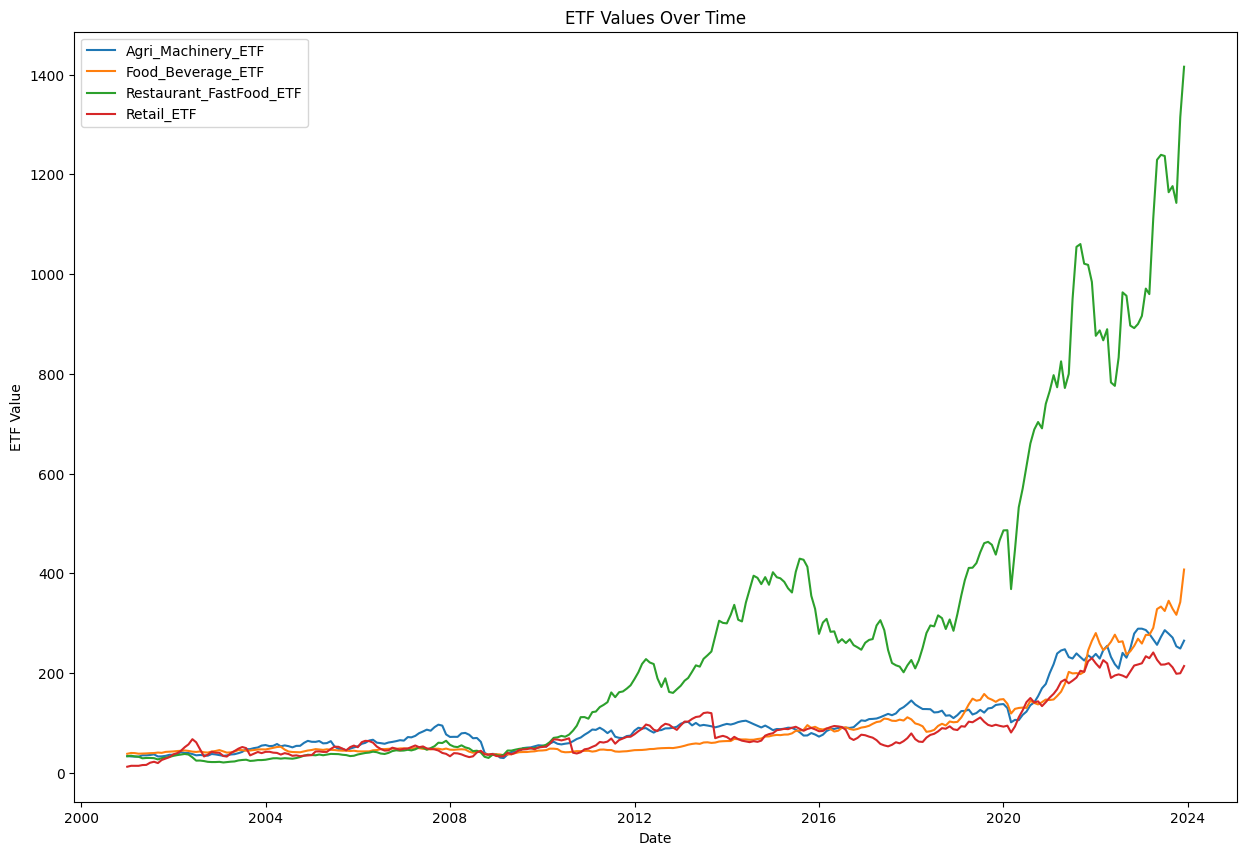

In [12]:
merged_etfs_xgb['Date'] = pd.to_datetime(merged_etfs_xgb[['Year', 'Month']].assign(DAY=1))

merged_etfs_xgb.set_index('Date', inplace=True)

# Select the ETF columns to plot
etf_columns = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']

# Plot the ETF values over time
plt.figure(figsize=(15, 10))
for etf in etf_columns:
    plt.plot(merged_etfs_xgb.index, merged_etfs_xgb[etf], label=etf)

plt.legend()
plt.xlabel('Date')
plt.ylabel('ETF Value')
plt.title('ETF Values Over Time')
plt.show()

In [20]:
xgb_df = merged_etfs_xgb.copy()

In [18]:
xgb_df

,Year,Month,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal,Agri_Machinery_ETF,...,Beef_lag3,Broilers_lag3,Lamb and Mutton_lag3,Other Chicken_lag3,Pork_lag3,Turkey_lag3,Veal_lag3,Coffee_lag3,Corn_lag3,Sugar_lag3
Date,,,,,,,,,,,,,,,,,,,,,
2001-07-01,2001,7,2163.50,2592.8,16.50,42.5,1425.50,463.9,15.50,35.808831,...,1924.50,2515.7,19.50,42.2,1523.50,462.0,15.00,65.997619,87.545067,8.052105
2001-08-01,2001,8,2410.50,2850.7,18.50,46.6,1589.50,470.1,17.00,37.040059,...,2279.50,2835.6,16.50,45.6,1545.00,428.8,15.50,69.631304,85.077523,8.959545
2001-09-01,2001,9,2105.50,2438.7,16.00,40.9,1502.50,494.9,14.50,32.814249,...,2255.00,2636.6,16.00,44.0,1448.50,488.3,15.50,63.846190,83.160666,8.742857
2001-10-01,2001,10,2371.00,2897.2,19.50,47.0,1828.00,429.1,17.50,33.010042,...,2163.50,2592.8,16.50,42.5,1425.50,463.9,15.50,58.941364,90.754670,8.536190
2001-11-01,2001,11,2186.00,2500.7,19.50,39.4,1724.00,541.3,16.00,34.123924,...,2410.50,2850.7,18.50,46.6,1589.50,470.1,17.00,59.331304,92.879032,7.904348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,2023,8,2346.50,4156.7,9.70,51.1,2288.70,433.5,4.15,278.897895,...,2287.55,4043.4,10.65,52.7,2266.35,428.7,4.15,220.121304,268.172526,25.729565
2023-09-01,2023,9,2132.00,3805.5,9.40,48.4,2180.85,489.2,3.55,271.175546,...,2317.85,3956.3,10.20,52.9,2196.75,487.9,3.85,207.385000,266.935240,24.762273
2023-10-01,2023,10,2320.85,4177.3,10.55,50.6,2412.35,431.2,4.10,253.592562,...,2092.55,3717.2,8.80,50.9,2001.80,493.7,3.70,193.494286,235.271947,24.008095


## Train XGBoost with Raw Features

In [16]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def train_xgboost(data, target, n_train=36, n_test=12):
    features = ['Beef', 'Broilers', 'Lamb and Mutton', 'Other Chicken', 'Pork', 'Turkey', 'Veal', 'Coffee', 'Corn', 'Sugar']

    data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

    data[features + [target]] = data[features + [target]].astype(float)

    # Create lagged features
    def add_lagged_features(df, features, lags=[1, 2, 3]):
        for lag in lags:
            for feature in features:
                df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
        return df

    lags = [1, 2, 3]
    data = add_lagged_features(data, features, lags)

    data.dropna(inplace=True)

    lagged_features = [f'{feature}_lag{lag}' for feature in features for lag in lags]

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[lagged_features + [target]])

    scaled_df = pd.DataFrame(scaled_data, columns=lagged_features + [target])
    scaled_df['Date'] = data['Date'].values

    def walk_forward_validation(data, n_train, n_test):
        predictions = []
        actuals = []
        dates = []
        feature_importances = []

        for i in range(n_train, len(data) - n_test, n_test):
            train, test = data[i - n_train:i], data[i:i + n_test]
            
            X_train, y_train = train[lagged_features].values, train[target].values
            X_test, y_test = test[lagged_features].values, test[target].values

            model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), len(lagged_features))), y_test.reshape(-1, 1)), axis=1))[:, -1]
            y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), len(lagged_features))), y_pred.reshape(-1, 1)), axis=1))[:, -1]

            predictions.extend(y_pred_inv)
            actuals.extend(y_test_inv)
            dates.extend(test['Date'].values)

            feature_importances.append(model.feature_importances_)

        return np.array(predictions), np.array(actuals), np.array(dates), np.mean(feature_importances, axis=0)

    predictions, actuals, dates, feature_importances = walk_forward_validation(scaled_df, n_train, n_test)

    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

    plt.figure(figsize=(15, 5))
    plt.plot(dates, actuals, color='blue', label='Actual values')
    plt.plot(dates, predictions, color='red', label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

    feature_importance_df = pd.DataFrame({'Feature': lagged_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(feature_importance_df)

    plt.figure(figsize=(15, 5))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.show()
    # etf_columns = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']


In [27]:
xgb_df = merged_etfs_xgb.copy()

Mean Squared Error (MSE): 733.3743950099899
Root Mean Squared Error (RMSE): 27.080886156290934
R-squared (R²): 0.7783655063347661


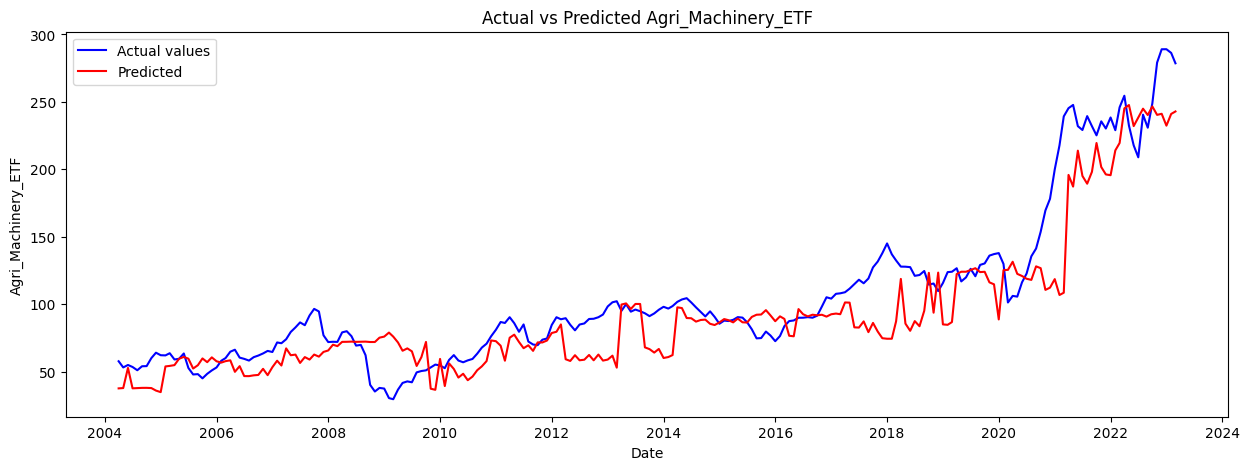

                 Feature  Importance
21           Coffee_lag1    0.149956
24             Corn_lag1    0.139075
23           Coffee_lag3    0.094886
27            Sugar_lag1    0.089906
29            Sugar_lag3    0.071581
26             Corn_lag3    0.053171
28            Sugar_lag2    0.051688
9     Other Chicken_lag1    0.048940
25             Corn_lag2    0.044157
14             Pork_lag3    0.026973
13             Pork_lag2    0.020090
22           Coffee_lag2    0.019600
20             Veal_lag3    0.018472
7   Lamb and Mutton_lag2    0.018002
8   Lamb and Mutton_lag3    0.017921
6   Lamb and Mutton_lag1    0.017759
10    Other Chicken_lag2    0.016831
11    Other Chicken_lag3    0.016325
16           Turkey_lag2    0.014176
2              Beef_lag3    0.012162
4          Broilers_lag2    0.009047
17           Turkey_lag3    0.007492
18             Veal_lag1    0.007365
12             Pork_lag1    0.006782
1              Beef_lag2    0.006705
19             Veal_lag2    0.006053
1

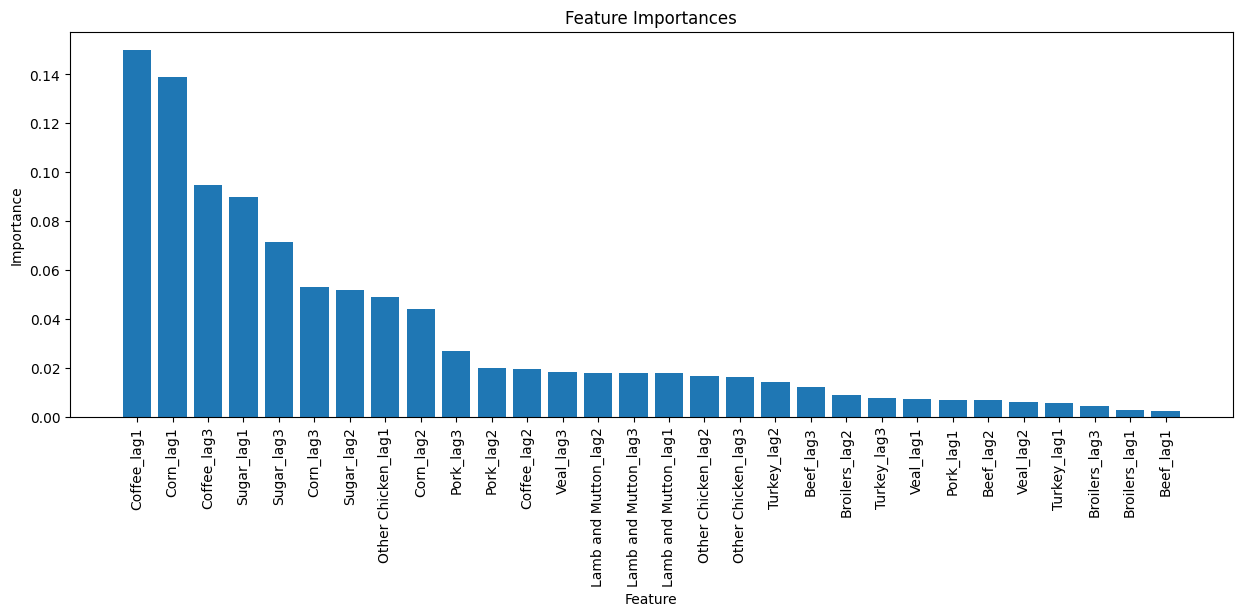

In [22]:
train_xgboost(xgb_df, 'Agri_Machinery_ETF')

Mean Squared Error (MSE): 732.5177952443645
Root Mean Squared Error (RMSE): 27.065065956771
R-squared (R²): 0.8093031274514867


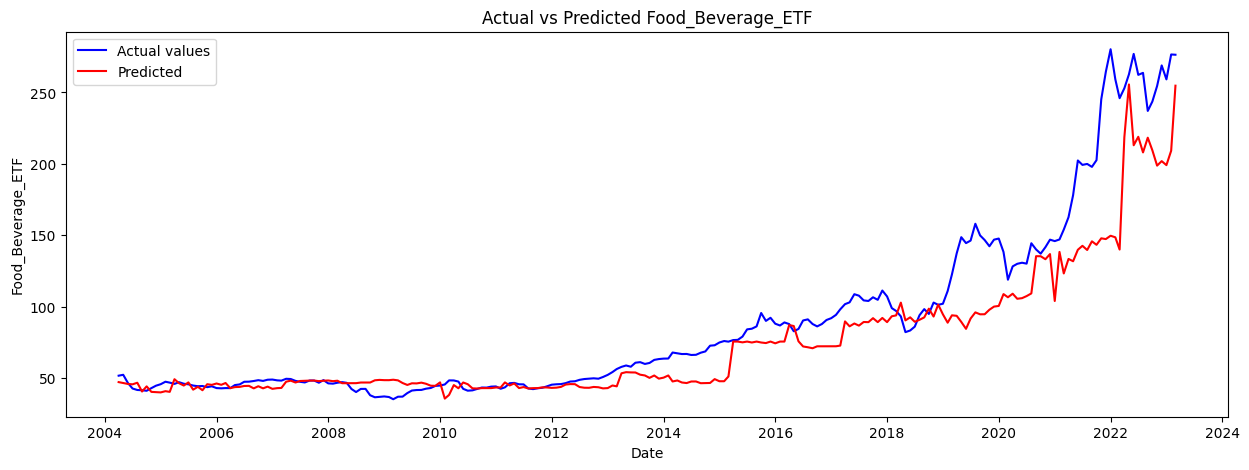

                 Feature  Importance
21           Coffee_lag1    0.141117
27            Sugar_lag1    0.101207
22           Coffee_lag2    0.101184
29            Sugar_lag3    0.091127
25             Corn_lag2    0.089099
24             Corn_lag1    0.058583
26             Corn_lag3    0.052210
11    Other Chicken_lag3    0.044806
28            Sugar_lag2    0.031642
23           Coffee_lag3    0.031130
6   Lamb and Mutton_lag1    0.030411
8   Lamb and Mutton_lag3    0.029852
2              Beef_lag3    0.020561
9     Other Chicken_lag1    0.019807
12             Pork_lag1    0.018189
13             Pork_lag2    0.015640
3          Broilers_lag1    0.013333
0              Beef_lag1    0.012633
4          Broilers_lag2    0.011296
20             Veal_lag3    0.011083
17           Turkey_lag3    0.010986
19             Veal_lag2    0.010233
16           Turkey_lag2    0.009474
1              Beef_lag2    0.009110
7   Lamb and Mutton_lag2    0.009064
18             Veal_lag1    0.007793
1

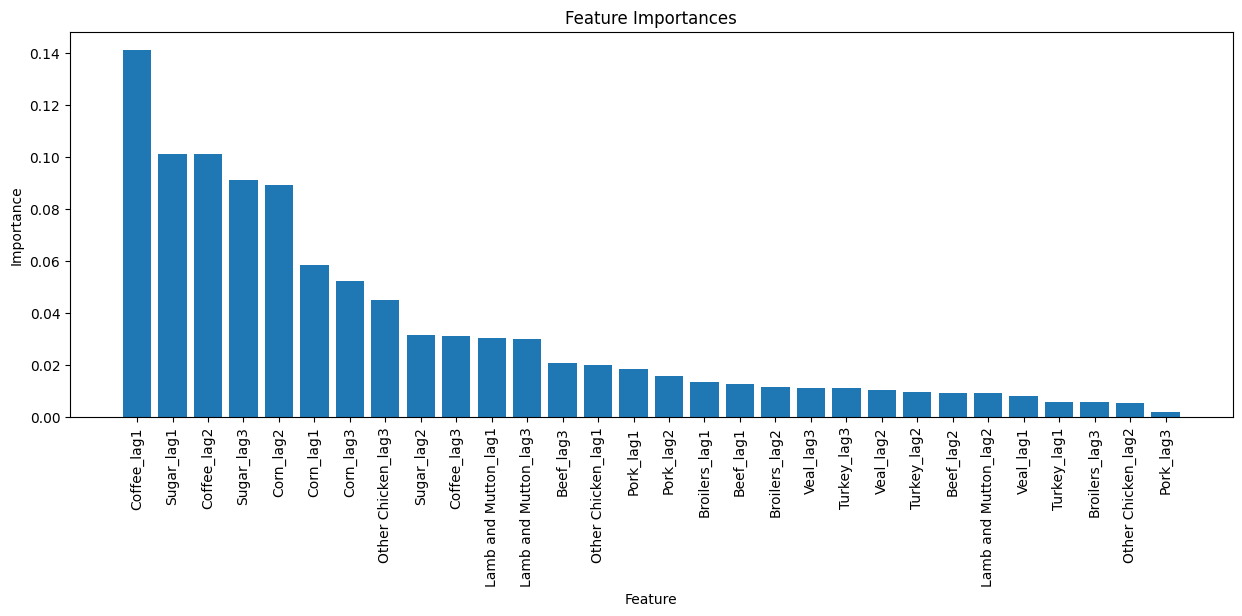

In [24]:
train_xgboost(merged_etfs_xgb, 'Food_Beverage_ETF')

Mean Squared Error (MSE): 14306.583046348798
Root Mean Squared Error (RMSE): 119.61012936348158
R-squared (R²): 0.8303035650674686


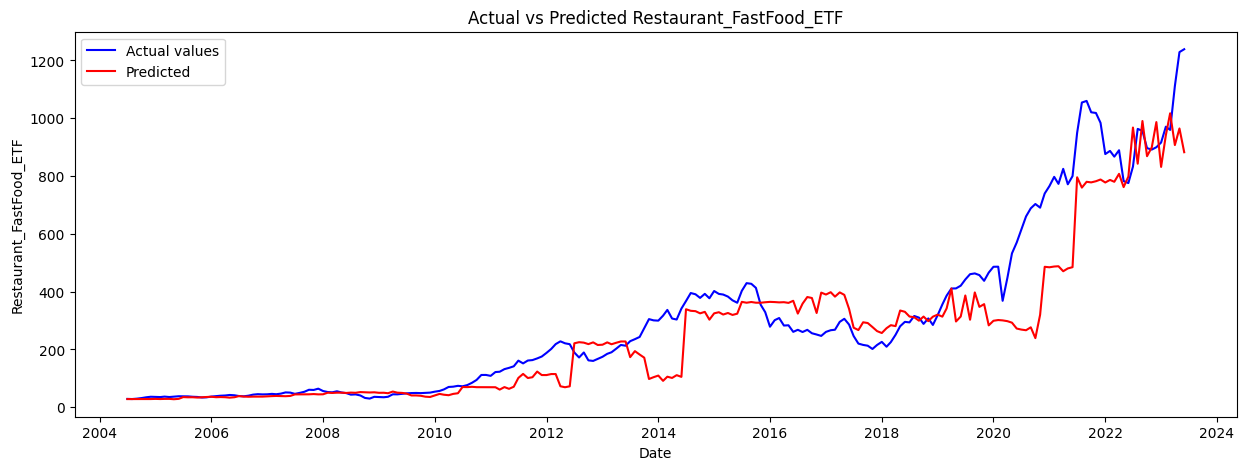

                 Feature  Importance
24             Corn_lag1    0.167760
26             Corn_lag3    0.155473
21           Coffee_lag1    0.097733
29            Sugar_lag3    0.068941
19             Veal_lag2    0.066138
28            Sugar_lag2    0.063797
22           Coffee_lag2    0.061958
25             Corn_lag2    0.054853
23           Coffee_lag3    0.052748
27            Sugar_lag1    0.040164
20             Veal_lag3    0.034084
11    Other Chicken_lag3    0.033390
1              Beef_lag2    0.010821
14             Pork_lag3    0.010519
13             Pork_lag2    0.009400
6   Lamb and Mutton_lag1    0.009397
5          Broilers_lag3    0.006054
17           Turkey_lag3    0.005838
15           Turkey_lag1    0.005689
8   Lamb and Mutton_lag3    0.005599
7   Lamb and Mutton_lag2    0.005086
9     Other Chicken_lag1    0.005044
10    Other Chicken_lag2    0.004985
18             Veal_lag1    0.004654
3          Broilers_lag1    0.004377
12             Pork_lag1    0.003852
0

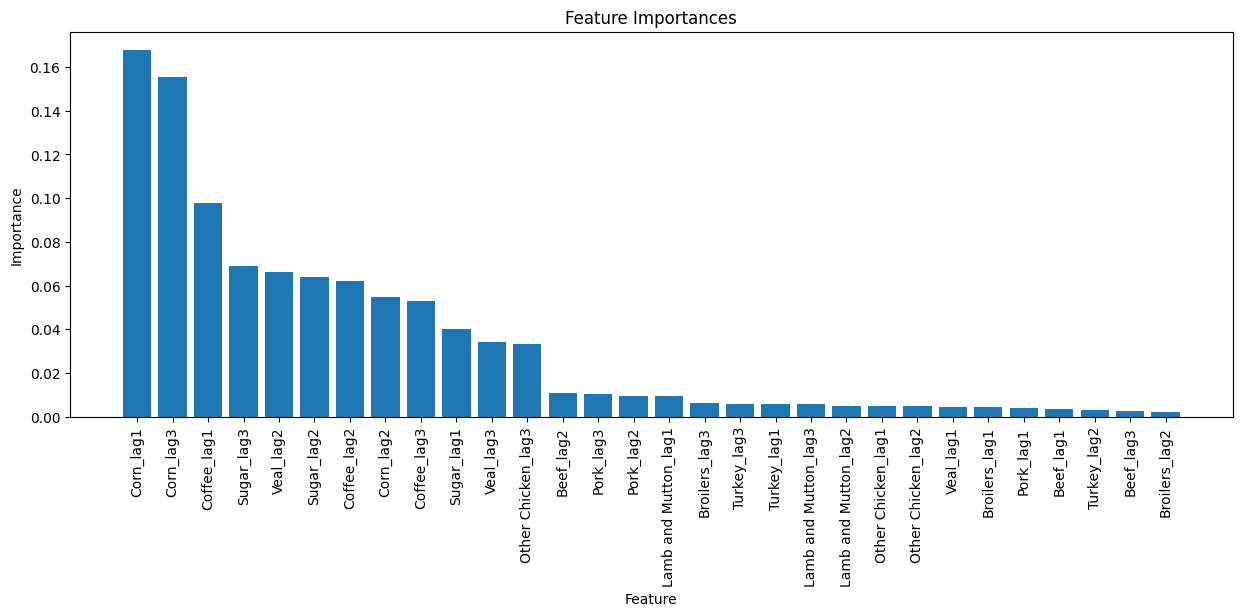

In [26]:
train_xgboost(merged_etfs_xgb, 'Restaurant_FastFood_ETF')

Mean Squared Error (MSE): 510.090850189343
Root Mean Squared Error (RMSE): 22.58519094870227
R-squared (R²): 0.8223595299040665


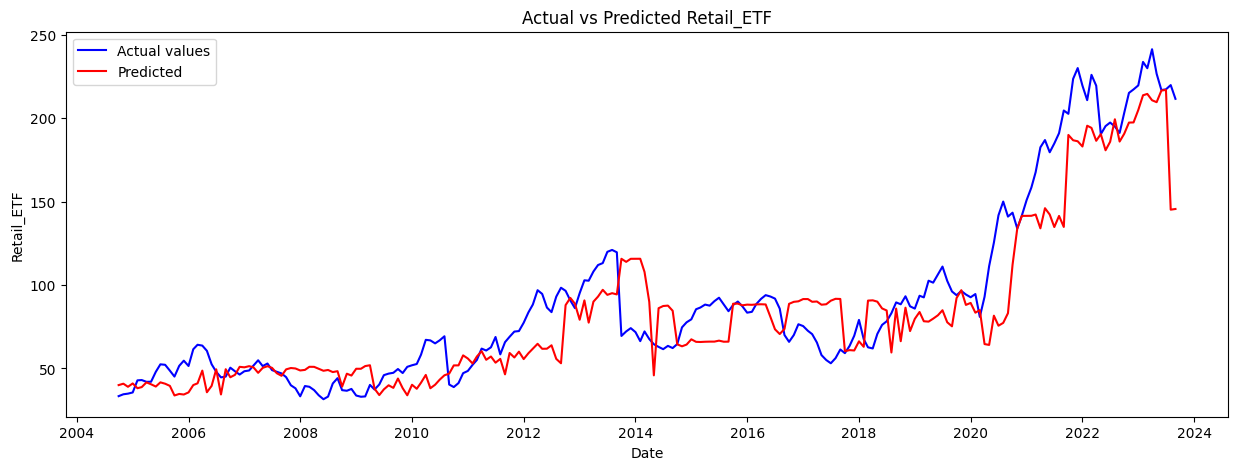

                 Feature  Importance
21           Coffee_lag1    0.123154
27            Sugar_lag1    0.120431
24             Corn_lag1    0.112199
29            Sugar_lag3    0.092349
26             Corn_lag3    0.081129
22           Coffee_lag2    0.070980
23           Coffee_lag3    0.062010
20             Veal_lag3    0.050269
28            Sugar_lag2    0.041718
5          Broilers_lag3    0.025156
25             Corn_lag2    0.024807
19             Veal_lag2    0.018623
18             Veal_lag1    0.016407
14             Pork_lag3    0.016343
1              Beef_lag2    0.015638
13             Pork_lag2    0.015360
6   Lamb and Mutton_lag1    0.014050
4          Broilers_lag2    0.011882
7   Lamb and Mutton_lag2    0.010377
12             Pork_lag1    0.010303
11    Other Chicken_lag3    0.010080
2              Beef_lag3    0.010025
15           Turkey_lag1    0.009103
0              Beef_lag1    0.008442
8   Lamb and Mutton_lag3    0.006829
10    Other Chicken_lag2    0.006516
9

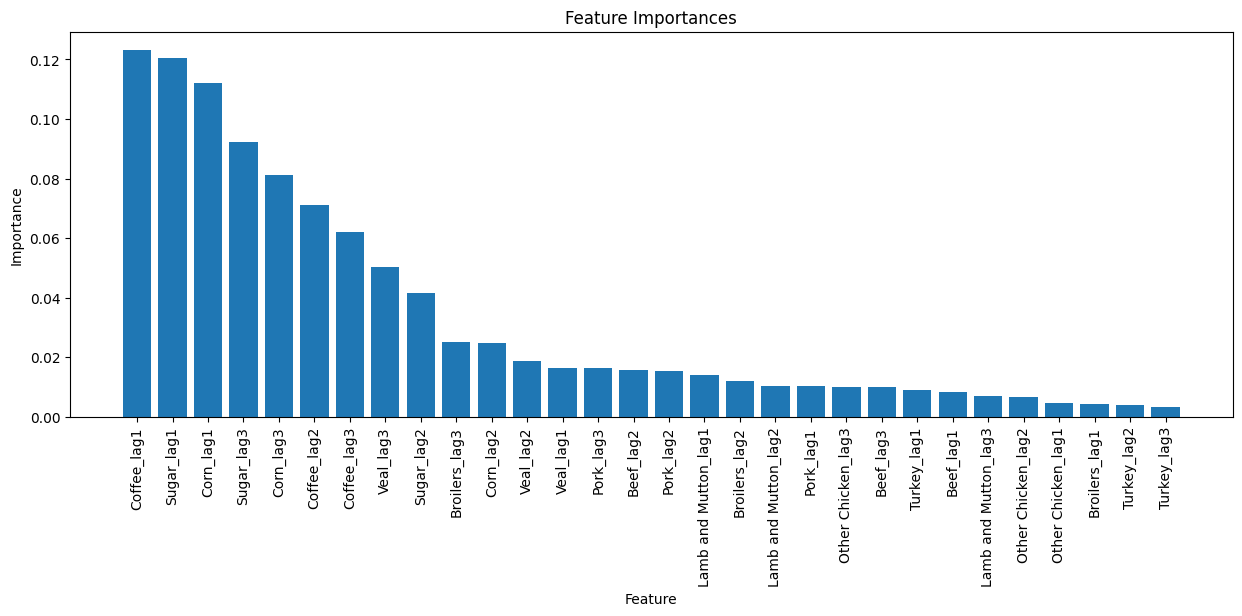

In [28]:
train_xgboost(merged_etfs_xgb, 'Retail_ETF')